# Decision Tree Klassifikator mit Sklearn

Eric Hirsch und Jonas Morsch 

### Einbinder alle benötigten Bibliotheken 

In [19]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree # to draw a classification tree
from random import randrange

from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay,mean_squared_error
import random 

import Data_preparation as DP 
DP=DP.Data_preparation()

import seaborn as sns
import matplotlib.pyplot as plt


#from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### Den Datensatz laden

In [20]:
df = DP.load_csv_to_df("ricsData_big_v5.csv")
print(df.columns)# Anzeigen aller features und Labels 

Index(['Rel_BreitGross', 'RelSpitze_oben', 'RelSpitze_unten', 'Anzahl_Linie',
       'Anzahl_Ecken', 'Anzahl_Kreis', 'innere_Konturen', 'Label'],
      dtype='object')


In [21]:
# Merkamle welche für die Klassifizierung benutzt werden sollen auswählen 
df=df[["Rel_BreitGross","RelSpitze_oben","RelSpitze_unten","Anzahl_Linie","Label"]]
X_train,X_test,y_train,y_test=DP.split_data(df,0.7)# Aufteilen der Daten in Trainings und Testdaten 
df.head()

training set size: 564 samples 
test set size: 241 samples


,Rel_BreitGross,RelSpitze_oben,RelSpitze_unten,Anzahl_Linie,Label
0,0.288606,0.074919,0.618893,6,0
1,0.494050,0.685185,0.634259,5,0
2,0.497540,0.986384,0.989410,15,0
3,0.480687,0.714286,0.592262,21,0
4,0.322937,0.159763,0.633136,21,0


In [22]:
X_train, X_test, y_train,y_test = DP.split_data(df,0.7)# Aufteilen der Daten 

training set size: 564 samples 
test set size: 241 samples


### Den Decision Tree Classifier erzeugen und trainiern 

In [23]:
from sklearn.tree import DecisionTreeClassifier
Classifier = DecisionTreeClassifier(max_depth=10, random_state = 42)
Classifier.fit(X_train.values, y_train.values)

DecisionTreeClassifier(max_depth=10, random_state=42)

### Plotten des Decision Trees 

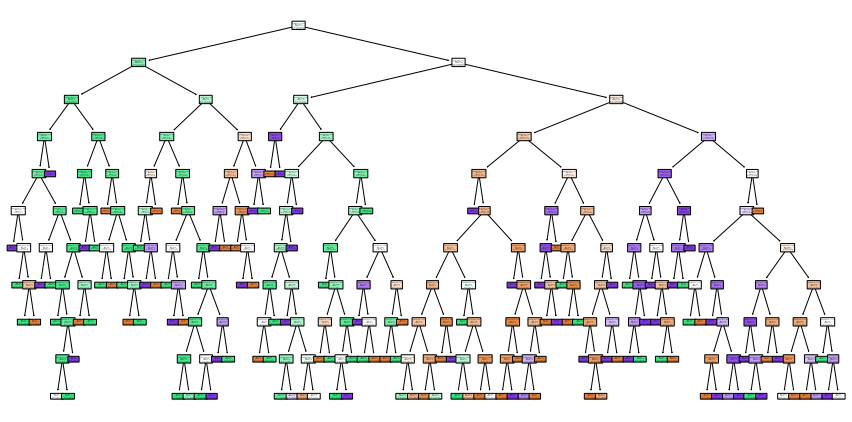

In [24]:
plt.figure(figsize=(15, 7.5))
plot_tree(Classifier, 
          filled=True, 
          rounded=True, 
          class_names=["Dosenoeffner", "Falschenoeffner", "Korkenzieher"], 
          feature_names=df.columns[:-1]); 

In [25]:
y_pred = Classifier.predict(X_test.values)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5435684647302904

# Ausgeben der Metrics 

              precision    recall  f1-score   support

           0       0.45      0.48      0.46        63
           1       0.59      0.62      0.61        85
           2       0.57      0.52      0.54        93

    accuracy                           0.54       241
   macro avg       0.54      0.54      0.54       241
weighted avg       0.55      0.54      0.54       241

Mean squarred Error: 0.9832624162720306
Confusion matrix
[[30 13 20]
 [16 53 16]
 [21 24 48]]


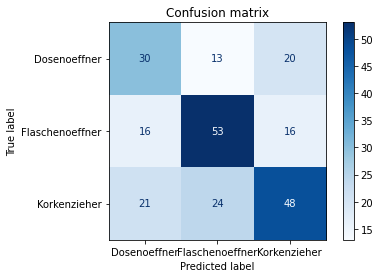

In [26]:
print(metrics.classification_report(y_test,y_pred))
np.set_printoptions(precision=2) # nur zwei nachkoma Stellen anzeigen 
class_names=["Dosenoeffner","Flaschenoeffner","Korkenzieher"]# Namen der Klassen 

rms=mean_squared_error(y_test,y_pred,squared=False)

print("Mean squarred Error:",rms)


### erzeugen einer Konfusionsmatrix
disp = ConfusionMatrixDisplay.from_estimator(
    Classifier,
    X_test.values,
    y_test,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion matrix")

print("Confusion matrix")
print(disp.confusion_matrix)

### Vorhersagen eines einzelnen Bildes 

In [27]:

value=randrange(len(X_test))
X_single_test = X_test.iloc[[value-1]]



random_index=random.randint(0,len(X_test)) # ein Index im Bereich 0 länge der Testdaten wählen 
prediction=Classifier.predict(X_test.values[random_index].reshape(1,-1))# ein zufälligesd Bild Vorhersagen 
print("Class predictet by Decision Tree: {}".format(prediction))
print("actual Class: {} ".format(y_test.iloc[random_index,:]))



Class predictet by Decision Tree: [1]
actual Class: Label    1
Name: 519, dtype: int64 
